<a href="https://colab.research.google.com/github/ibrahimalsamarrae/ai_yas/blob/main/konusma_duygu_tan%C4%B1ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Konuşma Duygusu Tanıma, derin öğrenme ses sınıflandırma projesidir. Projenin amacı, konuşma sesini analiz etmek ve karşılık gelen duyguyu sınıflandırmaktır. Bu model, konuşma, müzik, şarkı vb. ses tabanlı tanıma projeleri için kullanılabilir.
### Bu proje eğitiminde, çeşitli ses dosyalarını analiz edip ilgili bir sınıfa göre sınıflandıracağız ve seslerin frekansını bir çizim yoluyla görselleştireceğiz.

Veri Kümesi Bilgileri

200 hedef kelime ve (26 yaş ve 64 yaş) vardır.
yedi duygunun (öfke, iğrenme, korku, mutluluk, hoş sürpriz, üzüntü ve normal) her birinin betimlendiği setin kayıtları yapılmıştır. Toplamda 2800 veri noktası (ses dosyası) vardır.


Veri seti, iki kadın oyuncunun her birinin ve duygularının kendi klasörlerinde yer alacağı şekilde düzenlenmiştir. Ve bunun içinde, 200 hedef kelimenin tamamı ses dosyası bulunabilir. Ses dosyasının formatı bir WAV formatıdır.

In [1]:
import pandas as pd #veri manipülasyonu ve analizi yapmak için kullanılır
import numpy as np #diziler üzerinde çok çeşitli matematiksel işlemleri gerçekleştirmek için kullanılır
import os #sistem komutunu kullanarak dosyaları işlemek için kullanılır
import seaborn as sns #benzer işlevlere sahip matplotlib üzerine inşa edilmiştir
import matplotlib.pyplot as plt #veri görselleştirme ve grafik çizim için kullanılır
import librosa #ses dosyalarını analiz etmek için kullanılır
import librosa.display #ses verilerini görüntü olarak görüntülemek için kullanılır
from IPython.display import Audio #sesi görüntülemek ve duymak için kullanılır
import warnings #uyarı ayrıntılarını değiştirmek için
warnings.filterwarnings('ignore')

In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Konuşma Duygu Tanıma/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('veri seti hazir')

veri seti hazir


Konuşma verilerinin yolları daha fazla işlenmek üzere yüklendi

Dosya adları bölündü ve etiketler olarak eklendi

Düzgün işlenmesini sağlamak için tüm karakterler küçük harfe dönüştürüldü

In [3]:
len(paths)

2800

In [4]:
paths[:5]

['/content/drive/MyDrive/Colab Notebooks/Konuşma Duygu Tanıma/input/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_choice_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/Konuşma Duygu Tanıma/input/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_cab_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/Konuşma Duygu Tanıma/input/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_laud_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/Konuşma Duygu Tanıma/input/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_note_ps.wav',
 '/content/drive/MyDrive/Colab Notebooks/Konuşma Duygu Tanıma/input/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_kill_ps.wav']

In [5]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [6]:
#Şimdi ses dosyalarının ve etiketlerinin bir veri çerçevesini oluşturuyoruz.
df = pd.DataFrame()
df['konuşma'] = paths
df['label'] = labels
df.head()

,konuşma,label
0,/content/drive/MyDrive/Colab Notebooks/Konuşm...,ps
1,/content/drive/MyDrive/Colab Notebooks/Konuşm...,ps
2,/content/drive/MyDrive/Colab Notebooks/Konuşm...,ps
3,/content/drive/MyDrive/Colab Notebooks/Konuşm...,ps
4,/content/drive/MyDrive/Colab Notebooks/Konuşm...,ps


In [7]:
df['label'].value_counts()

ps         400
sad        400
happy      400
fear       400
neutral    400
disgust    400
angry      400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

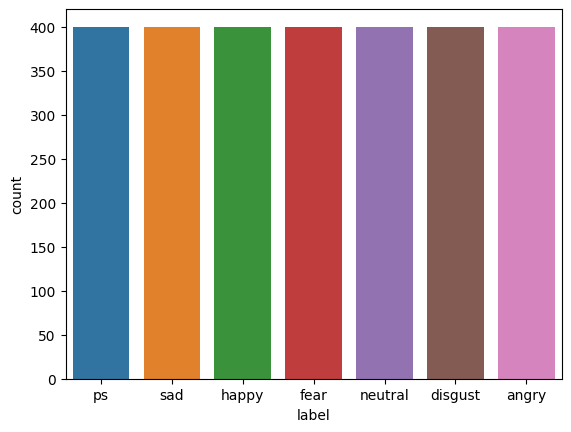

In [8]:
sns.countplot(x=df['label'])

In [9]:
#Şimdi dalga grafiği ve spektrogram için fonksiyonları tanımlıyoruz.
def waveplot(data, sr, duygu):
    plt.figure(figsize=(10,4))
    plt.title(duygu, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, duygu):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(duygu, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

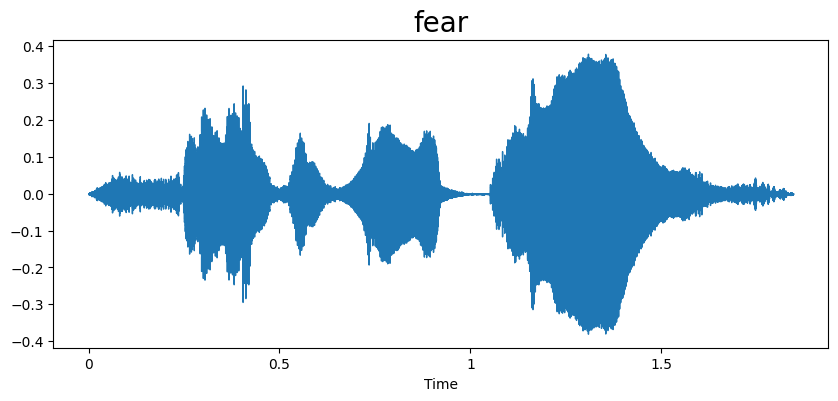

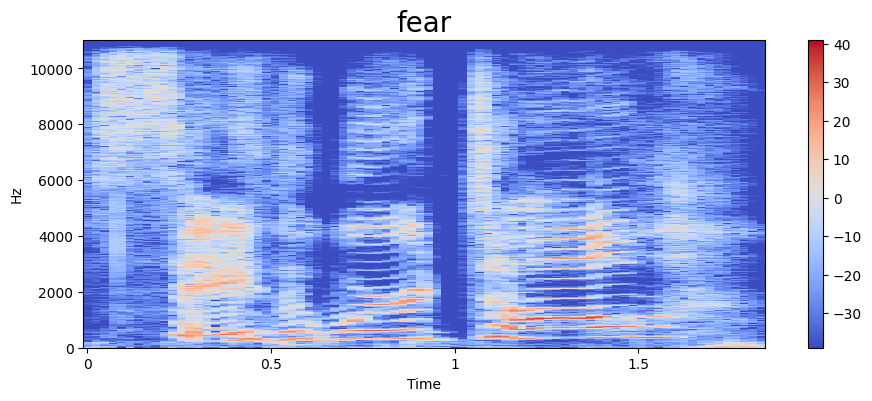

In [10]:
duygu = 'fear'
path = np.array(df['konuşma'][df['label']==duygu])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, duygu)
spectogram(data, sampling_rate, duygu)
Audio(path)

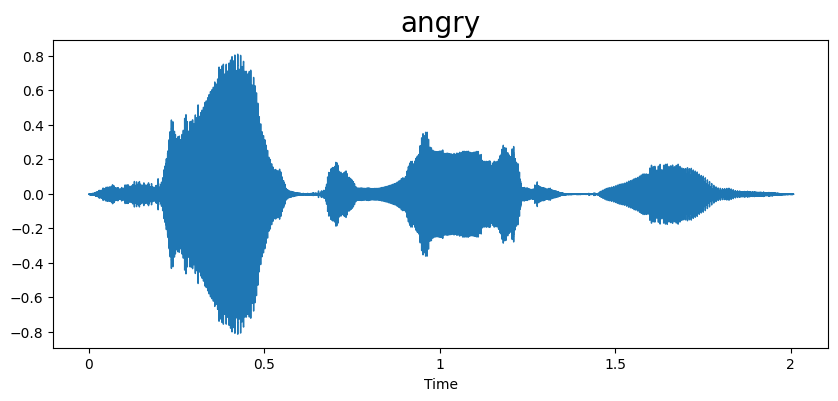

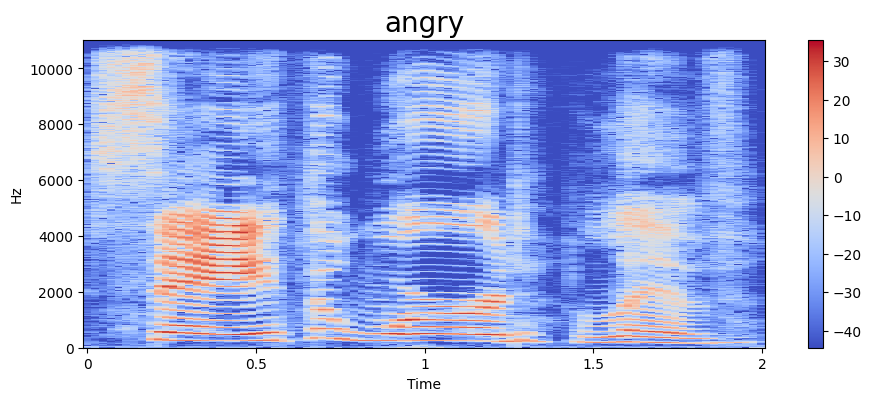

In [11]:
duygu = 'angry'
path = np.array(df['konuşma'][df['label']==duygu])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, duygu)
spectogram(data, sampling_rate, duygu)
Audio(path)

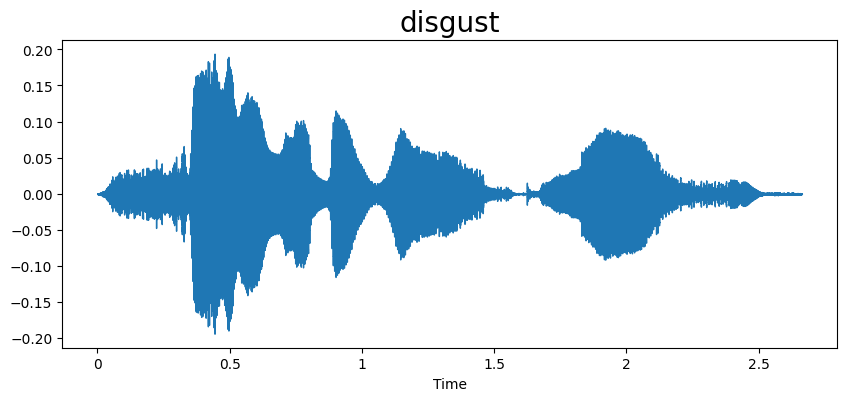

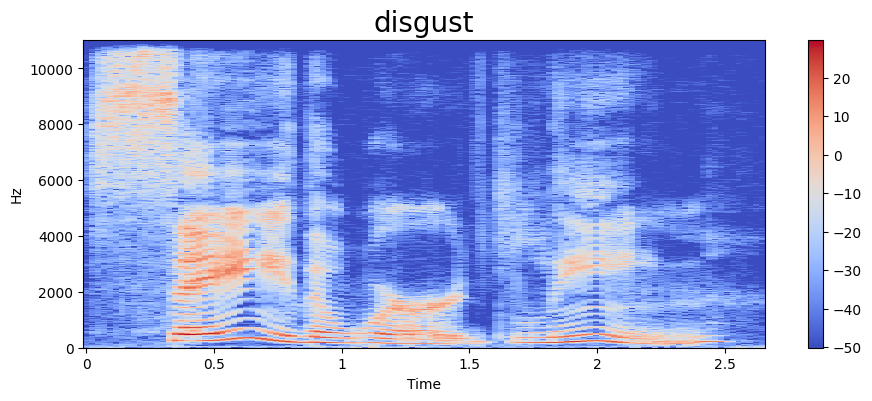

In [12]:
duygu = 'disgust'
path = np.array(df['konuşma'][df['label']==duygu])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, duygu)
spectogram(data, sampling_rate, duygu)
Audio(path)

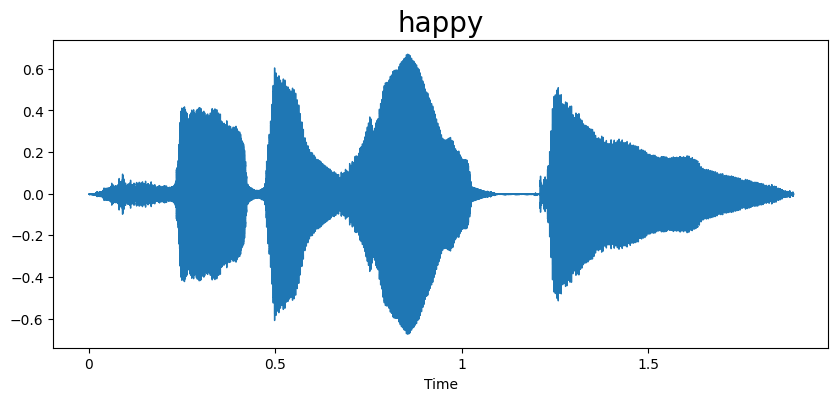

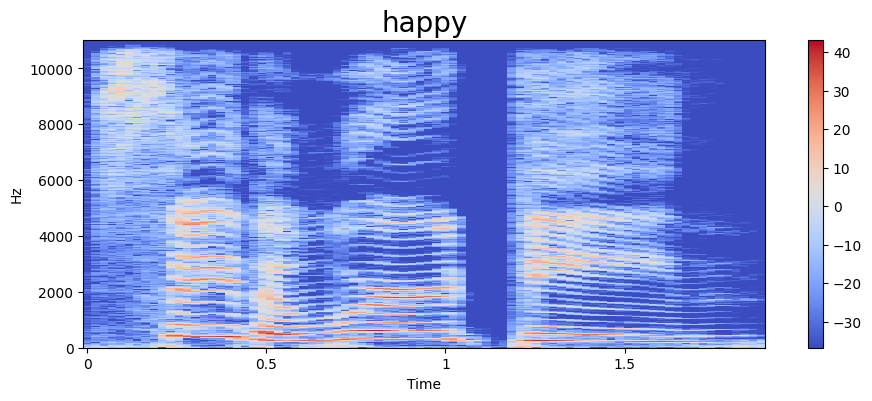

In [13]:
duygu = 'happy'
path = np.array(df['konuşma'][df['label']==duygu])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, duygu)
spectogram(data, sampling_rate, duygu)
Audio(path)

## grafiklere bakınca bunu fark ederiz:
Daha düşük perdeli sesler daha koyu renklere sahiptir
Daha yüksek perdeli sesler daha parlak renklere sahiptir

## Veri Büyütme
## Veri büyütme, ilk eğitim setimize küçük pertürbasyonlar ekleyerek yeni sentetik veri örnekleri oluşturduğumuz süreçtir.
## Ses için sözdizimsel veri oluşturmak için gürültü enjeksiyonu, kaydırma süresi, perde ve hız değiştirme uygulayabiliriz.
## Amaç, modelimizi bu pertürbasyonlara karşı değişmez kılmak ve genelleme yeteneğini geliştirmektir.
## Bunun işe yaraması için pertürbasyonların eklenmesi, orijinal eğitim örneğiyle aynı etiketi korumalıdır.
## Görüntülerde veri artırma, görüntüyü kaydırarak, yakınlaştırarak, döndürerek yapılabilir ...
## İlk olarak, veri setimiz için hangi büyütme tekniklerinin daha iyi çalıştığını kontrol edelim.

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(df['konuşma'])[0]
data, sample_rate = librosa.load(path)

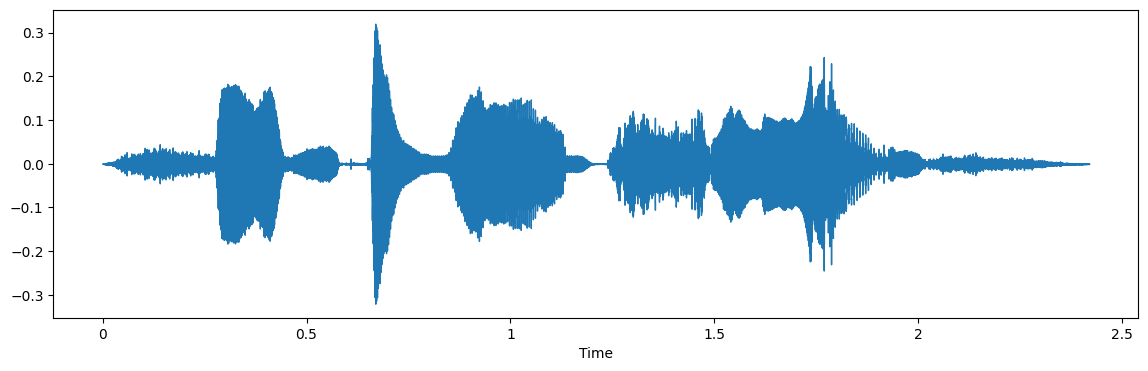

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

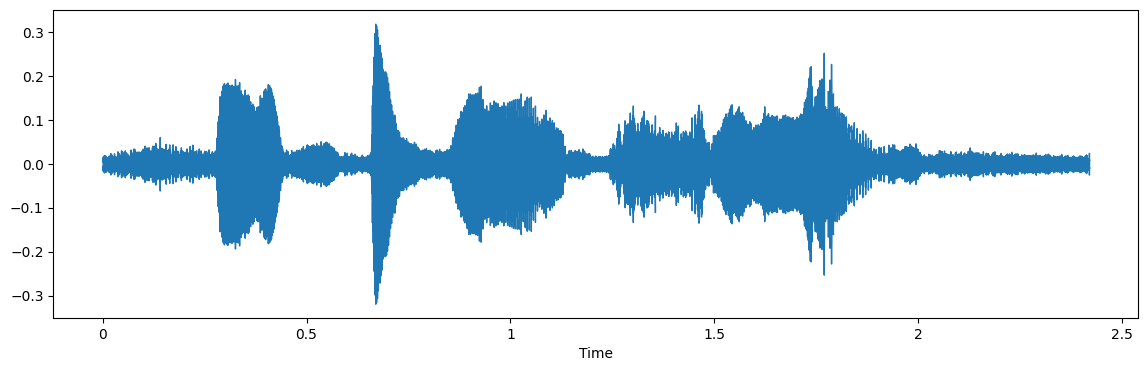

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

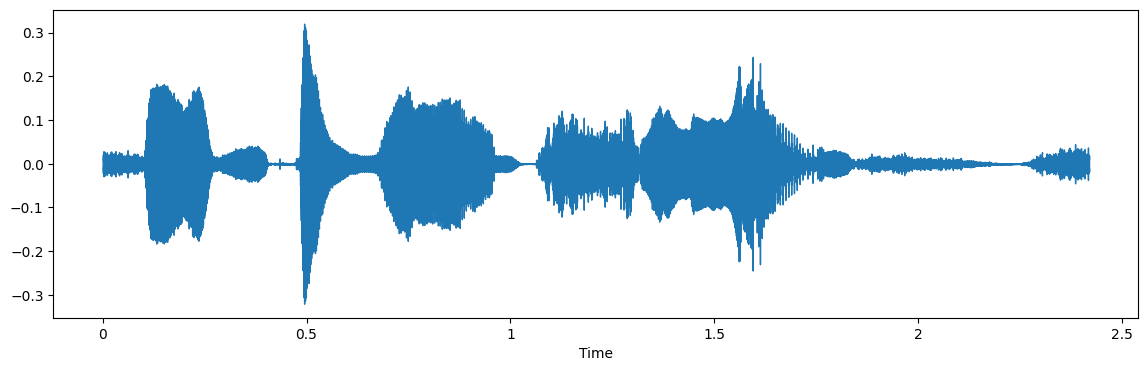

In [17]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

Özellik çıkarma
Özelliklerin çıkarılması, farklı şeyler arasındaki ilişkileri analiz etmede ve bulmada çok önemli bir kısımdır. modeller tarafından doğrudan anlaşılamaz, bu nedenle bunları, özellik çıkarımının kullanıldığı anlaşılır bir formata dönüştürmemiz gerekir.Ses sinyali, üç eksenin zamanı, genliği ve frekansı temsil ettiği üç boyutlu bir sinyaldir.
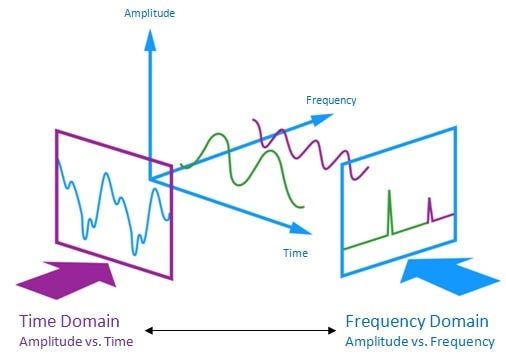

In [18]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    # süre ve ofset, yukarıda görüldüğü gibi her bir ses dosyasının başında ve sonunda ses olmamasını sağlamak için kullanılır.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
        
    return result

In [19]:
X, Y = [], []
for path, emotion in zip(df['konuşma'],df['label']):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # Her ses dosyasında 3 artırma tekniği yaptığımız için duyguyu 3 kez ekledik.
        Y.append(emotion)

In [20]:
len(X), len(Y), df['konuşma'].shape

(5600, 5600, (2800,))

In [21]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.273308,0.574184,0.555361,0.535787,0.520680,0.555071,0.505792,0.487714,0.516956,0.528688,...,0.006058,0.004783,0.004288,0.004141,0.002728,0.000967,0.000731,0.000624,0.000067,ps
1,0.288197,0.628281,0.612946,0.597124,0.600900,0.662383,0.633313,0.563697,0.564098,0.589443,...,0.006958,0.005832,0.005205,0.005178,0.003783,0.002009,0.001707,0.001601,0.001066,ps
2,0.117507,0.531841,0.510732,0.492676,0.441353,0.470673,0.561823,0.541936,0.584630,0.629178,...,0.000438,0.000319,0.000212,0.000184,0.000194,0.000113,0.000067,0.000049,0.000007,ps
3,0.201256,0.606000,0.606892,0.585217,0.552777,0.607079,0.618661,0.575236,0.668354,0.690603,...,0.001252,0.001073,0.000933,0.000981,0.000941,0.000922,0.000824,0.000817,0.000783,ps
4,0.095768,0.471594,0.461234,0.487626,0.513999,0.503549,0.446914,0.483024,0.546211,0.627516,...,0.000463,0.000602,0.000314,0.000183,0.000099,0.000045,0.000045,0.000027,0.000004,ps


Veri büyütme uyguladık ve her bir ses dosyası için özellikleri çıkardık ve kaydettik.

In [22]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

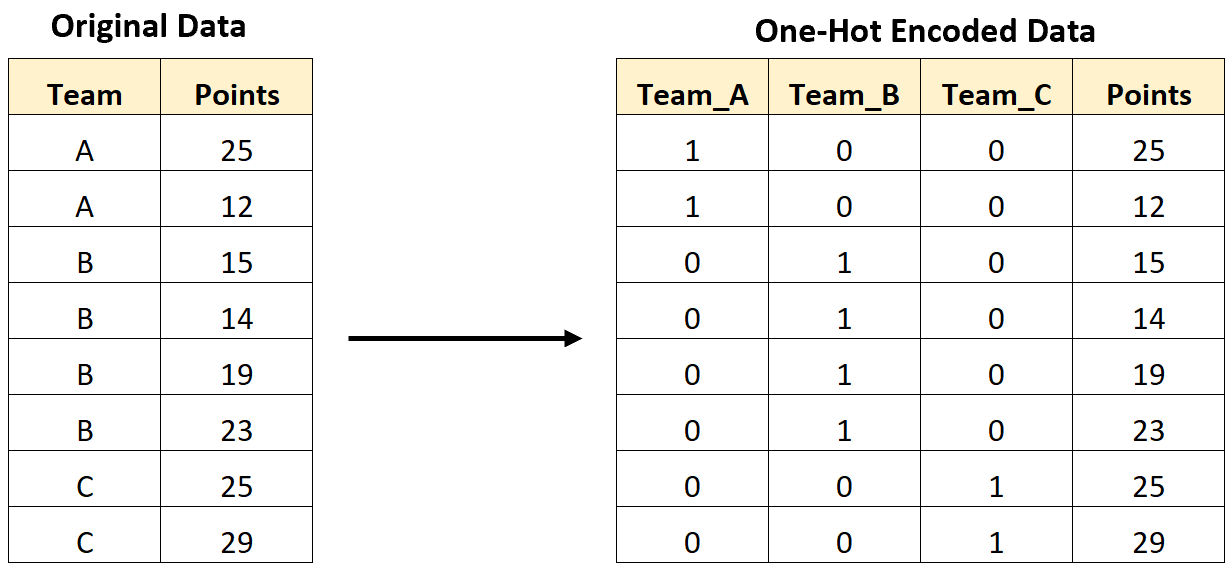

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4200, 162), (4200, 7), (1400, 162), (1400, 7))

In [25]:
# verilerinizi sklearn Standardscaler ile ölçeklendirme
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4200, 162), (4200, 7), (1400, 162), (1400, 7))

In [26]:
# verilerimizi modele uyumlu hale getirmek.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4200, 162, 1), (4200, 7), (1400, 162, 1), (1400, 7))

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization

model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 41, 128)           163968    
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 21, 128)          0

In [28]:
from keras.callbacks import ReduceLROnPlateau
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
66/66 [==============================] - 25s 361ms/step - loss: 1.5616 - accuracy: 0.3821 - val_loss: 0.9561 - val_accuracy: 0.7179 - lr: 0.0010
Epoch 2/50
66/66 [==============================] - 23s 355ms/step - loss: 0.8391 - accuracy: 0.7062 - val_loss: 0.4442 - val_accuracy: 0.8564 - lr: 0.0010
Epoch 3/50
66/66 [==============================] - 23s 338ms/step - loss: 0.5376 - accuracy: 0.8186 - val_loss: 0.3141 - val_accuracy: 0.9043 - lr: 0.0010
Epoch 4/50
66/66 [==============================] - 24s 359ms/step - loss: 0.3766 - accuracy: 0.8760 - val_loss: 0.2506 - val_accuracy: 0.9293 - lr: 0.0010
Epoch 5/50
66/66 [==============================] - 23s 354ms/step - loss: 0.2921 - accuracy: 0.9121 - val_loss: 0.1740 - val_accuracy: 0.9429 - lr: 0.0010
Epoch 6/50
66/66 [==============================] - 23s 350ms/step - loss: 0.2201 - accuracy: 0.9274 - val_loss: 0.1197 - val_accuracy: 0.9614 - lr: 0.0010
Epoch 7/50
66/66 [==============================] - 22s 338ms/st

In [29]:
model.save("my_model.h5")

44/44 [==============================] - 2s 34ms/step - loss: 0.0403 - accuracy: 0.9893
Accuracy of our model on test data :  98.92857074737549 %


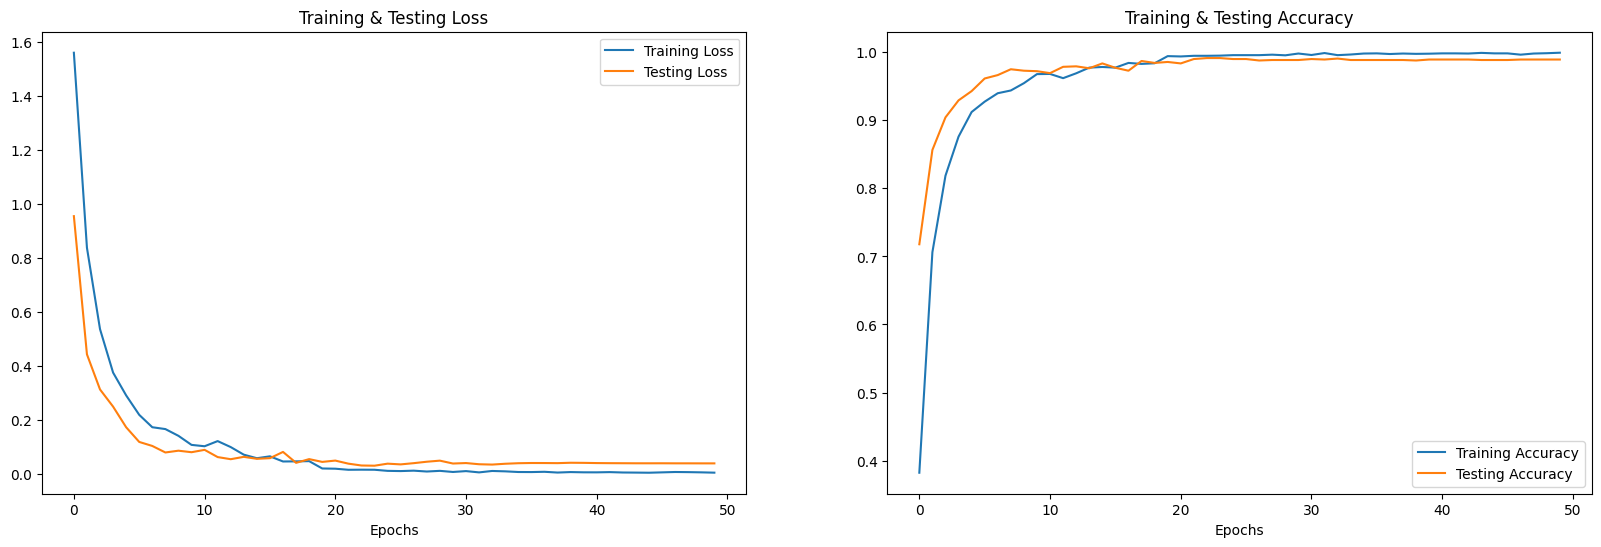

In [30]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [31]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

44/44 [==============================] - 2s 47ms/step


In [33]:
df = pd.DataFrame(columns=['Predicted Labels', 'gerçek Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['gerçek Labels'] = y_test.flatten()

df.head(15)

,Predicted Labels,gerçek Labels
0,sad,sad
1,fear,fear
2,ps,ps
3,ps,ps
4,neutral,neutral
5,sad,sad
6,sad,sad
7,fear,fear
8,happy,happy
9,happy,happy
